<a href="https://colab.research.google.com/github/nug1209/portfolio-projects-files/blob/main/bcg_telco_customer_retention_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

from sklearn.preprocessing import LabelEncoder

Load data.

In [ ]:
price_data_url = "https://github.com/nug-12/BCG_Data_Virtual_Experience/raw/refs/heads/main/price_data_2024.csv"
client_data_url = "https://github.com/nug-12/BCG_Data_Virtual_Experience/raw/refs/heads/main/client_data_2024.csv"
df_price = pd.read_csv(price_data_url)
df_client = pd.read_csv(client_data_url)

In [ ]:
df_price.head(14)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [ ]:

df_client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


See column names for price data.

In [ ]:
list(df_price)

['id',
 'price_date',
 'price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']

Rename columns and then see the column names for the client data.

In [ ]:
rename_columns = {'cons_12m': 'electricity_consumption_past_12_months',
                  'cons_gas_12m': 'gas_consumption_past_12_months',
                  'cons_last_month': 'electricity_consumption_last_month',
                  'date_activ': 'activation_date',
                  'date_end': 'end_date',
                  'date_modif_prod': 'product_modification_last_date',
                  'date_renewal': 'renewal_date',
                  'forecast_cons_12m': 'electricity_consumption_next_12_months_forecast',
                  'forecast_cons_year': 'electricity_consumption_next_year_forecast',
                  'forecast_meter_rent_12m': 'meter_rent_next_12_months_forecast',
                  'forecast_price_pow_off_peak': 'off_peak_power_price_forecast',
                  'forecast_price_energy_off_peak': 'off_peak_energy_price_forecast',
                  'forecast_price_pow_peak': 'peak_energy_price_forecast',
                  'imp_cons': 'paid_consumption',
                  'margin_gross_pow_ele': 'power_subscription_gross_margin',
                  'margin_net_pow_ele': 'power_subscription_net_margin',
                  'nb_prod_act': 'active_product_number',
                  'num_years_antig': 'client_antiquity_in_years',
                  'origin_up': 'origin_campaign',
                  'pow_max': 'subscribed_power'
                 }
df_client = df_client.rename(columns=rename_columns)
list(df_client)

['id',
 'channel_sales',
 'electricity_consumption_past_12_months',
 'gas_consumption_past_12_months',
 'electricity_consumption_last_month',
 'activation_date',
 'end_date',
 'product_modification_last_date',
 'renewal_date',
 'electricity_consumption_next_12_months_forecast',
 'electricity_consumption_next_year_forecast',
 'forecast_discount_energy',
 'meter_rent_next_12_months_forecast',
 'off_peak_energy_price_forecast',
 'forecast_price_energy_peak',
 'off_peak_power_price_forecast',
 'has_gas',
 'paid_consumption',
 'power_subscription_gross_margin',
 'power_subscription_net_margin',
 'active_product_number',
 'net_margin',
 'client_antiquity_in_years',
 'origin_campaign',
 'subscribed_power',
 'churn']

So basically the price data is the data of monthly price of power consumed by each customer. The client data is the data data of many features of the customers's subscription with the company.

Convert columns to datetime type.

In [ ]:
def convert_to_date(column: pd.Series = None):
    column = pd.to_datetime(column, format='%Y-%m-%d')
    return column

date_columns1 = ['activation_date', 'end_date', 'product_modification_last_date', 'renewal_date']

for column_name in date_columns1:
    df_client[column_name] = convert_to_date(df_client[column_name])

date_columns2 = ['price_date']
for column_name in date_columns2:
    df_price[column_name] = convert_to_date(df_price[column_name])

Check the info of all tables. Price data first.

In [ ]:
def get_info(df):
  print("Head:\n\n")
  print(df.head())
  print("---\n\nShape:\n\n")
  print(df.shape)
  print("---\n\nData types:\n")
  print(df.dtypes)
  print("---\n\nDescription:\n")
  print(df.describe())

get_info(df_price)

Head:


                                 id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3           

Check info for client data.

In [ ]:
get_info(df_client)

Head:


                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   electricity_consumption_past_12_months  gas_consumption_past_12_months  \
0                                       0                           54946   
1                                    4660                               0   
2                                     544                               0   
3                                    1584                               0   
4                                    4425                               0   

   electricity_consumption_last_month activation_date   end_date  \
0                     

Create pairplot visualization from client data if image doesn't exist yet. If it exists, load the existing image. First, encode the non-numerical columns to numerical columns first.

In [ ]:
def encode_categorical_columns(df):
  label_encoders = {}
  df_encoded = df.copy()

  for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])

  return df_encoded

Loading image...


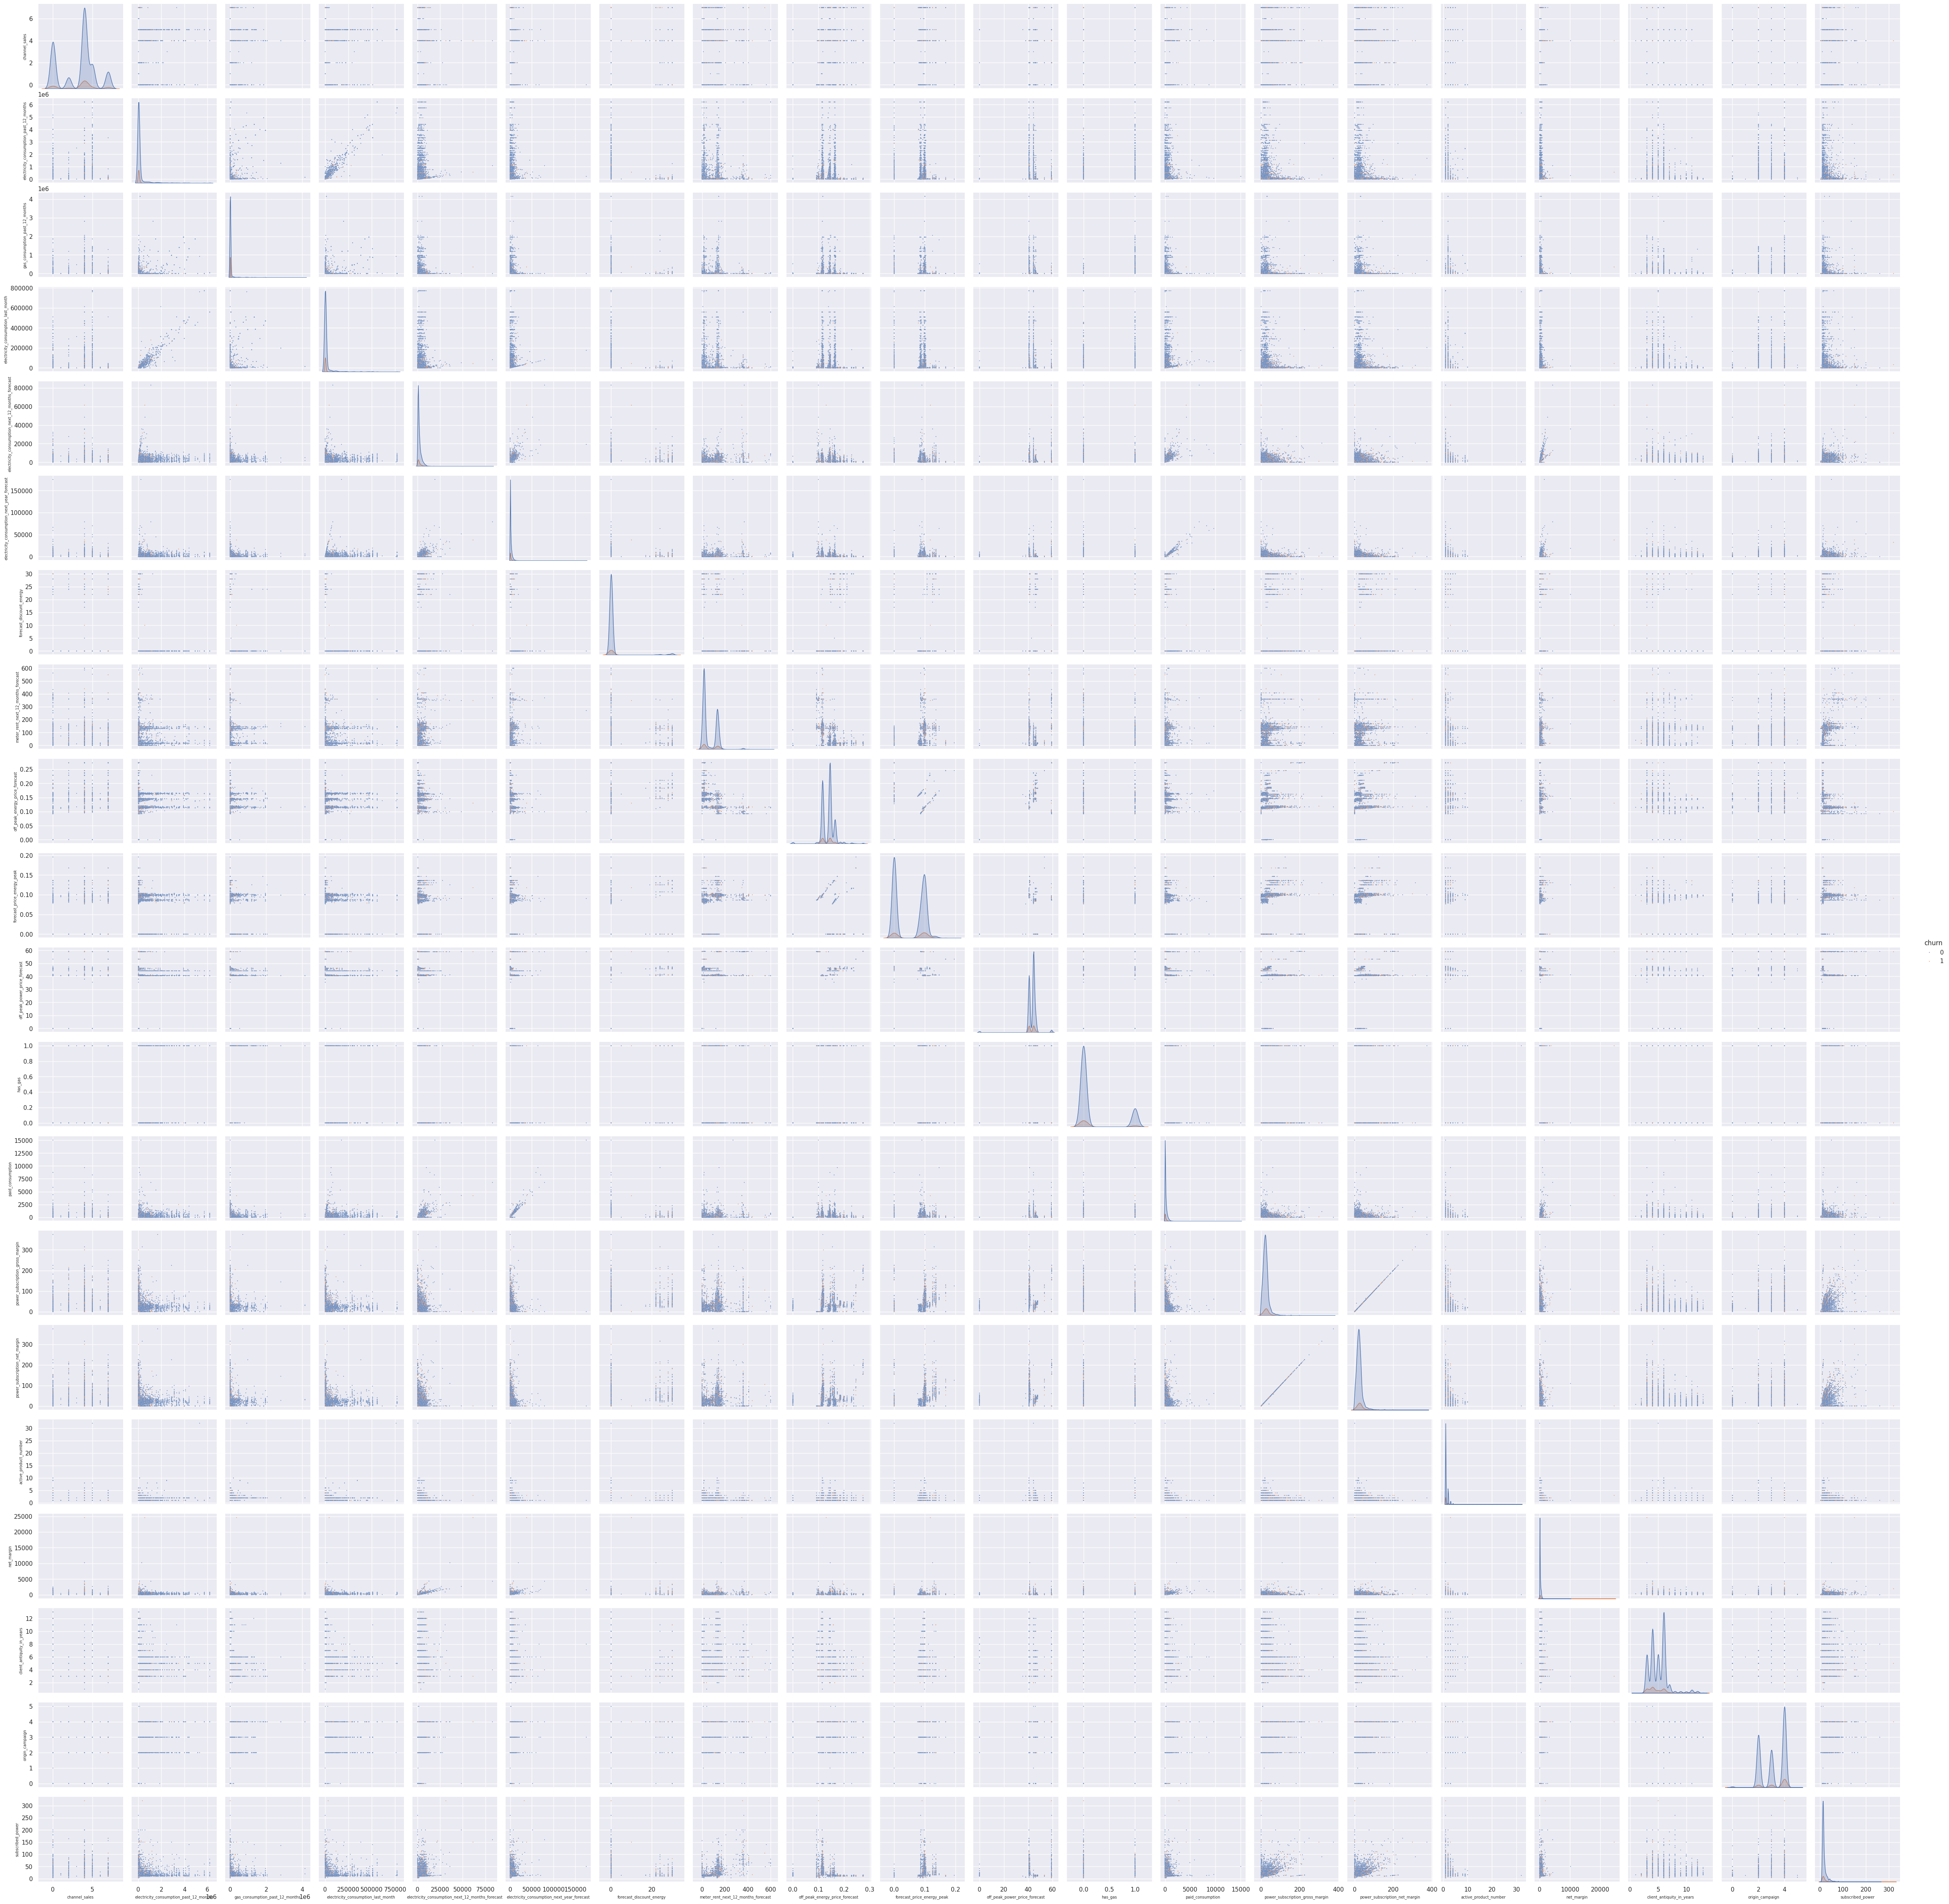

In [ ]:
img1 = 'https://raw.githubusercontent.com/nug-12/BCG_Data_Virtual_Experience/refs/heads/main/download%20(33).png'
# img1 = None

if img1 == None:
  sns.set(rc={'figure.figsize':(70, 70), 'axes.labelsize':7})
  df_client_encoded = encode_categorical_columns(df_client)
  df_client_encoded = df_client_encoded.drop(columns=['id'])
  sns.pairplot(df_client_encoded, hue='churn', plot_kws={'s':2})
  # sns.pairplot(df_client[numerical_columns], hue='churn', plot_kws={'s':3})

else:
  print("Loading image...")
  display(Image(img1))

After examination of the above pairplot, I conclude that the features having good predictive potential are channel sales, has gas and meter rent next 12 month forecast.

Looking at individual plots on the 400 plots inside the pair plot, I found several plots whose distribution of churns may not be random, and therefore may have potential predictive powers. I locate these plots based coordinates, with the 0,0 location located on the most bottom left of the plot. These individual plots are:
1,4 |
12,8 |
20,14 |
4,16 |
6,16 |
8,16 |
14,16 |
15,16 |
17,17 |
5,17 |
2,18 |
15,18 |
14,18 |
19,19 |
17,19.